YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


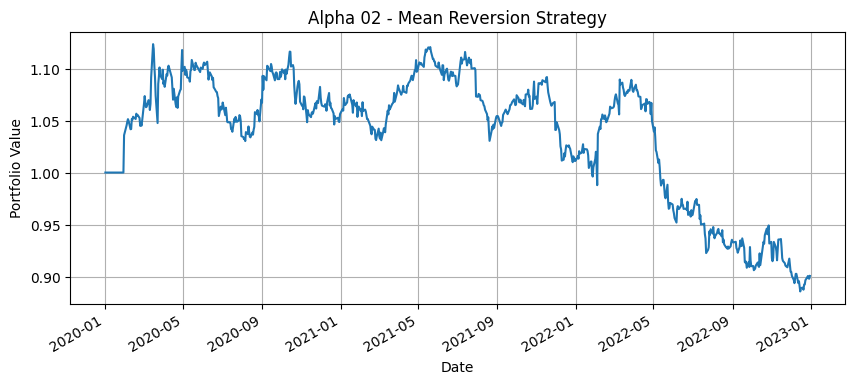

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import sys, os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from utils.backtest_utility import market_neutral_weights, backtest_portfolio, plot_equity_curve

# === Step 1: Download Data ===
tickers = ["AAPL", "MSFT", "GOOG", "AMZN"]
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")["Close"]
data = data.dropna()
data.head()

# === Step 2: Compute Z-score for Mean Reversion ===
window = 20  # look-back window for moving average

# Z-score = (Price - Moving Avg) / Std Dev
mean = data.rolling(window=window).mean()
std = data.rolling(window=window).std()
zscore = (data - mean) / std

zscore = zscore.dropna()
zscore.tail()


# === Step 3: Use negative z-score as signal (mean reversion logic) ===
# If zscore is high (stock is "too expensive") → sell
# If zscore is low (stock is "too cheap") → buy

signal = -zscore  # invert it to bet on reversion

# === Step 4: Convert to Market-Neutral Weights ===
weights = signal.apply(market_neutral_weights, axis=1)
weights.tail()

# === Step 5: Backtest ===
equity_curve = backtest_portfolio(data, weights)
plot_equity_curve(equity_curve, "Alpha 02 - Mean Reversion Strategy")
